In [43]:
import sympy
sympy.init_printing()

# Model Basline Information

The Model is in the form:

$$ y(s) = G(s)u(s) + G_d(s)d(s)$$

where,

$$ y(s) = \begin{bmatrix} y_1 = overhead \space ethanol \space fraction \\ y_2 = side \space stream \space ethanol \space fraction \\ y_3 = tray \space 19 \space temperature \end{bmatrix}$$

$$ G(s) = \begin{bmatrix} G_{11} & G_{12} & G_{13} \\ G_{21} & G_{22} & G_{23} \\ G_{31} & G_{32} & G_{33} \end{bmatrix}$$

$$ u(s) = \begin{bmatrix} u_1 = reflow \space flow \space rate \\ u_2 = side \space stream \space pressure \\ u_3 = reboiler \space stream \space pressure \end{bmatrix}$$

$$ G_d(s) = \begin{bmatrix} G_{d11} & G_{d12} \\ G_{d21} & G_{d22} \\ G_{d31} & G_{d32} \end{bmatrix}$$

$$ d(s) = \begin{bmatrix} d_1 = feed \space flow \space rate \\ d_2 = feed \space temperature \end{bmatrix}$$

The model is already linearized and represented in terms of deviation variables. The steady-state values of the various parameters are as follows:

|Model Inputs|Values|Model Outputs|Values|Model Disturbances|Values|
|------------|------|-------------|------|------------------|------|
|u1          |0.18  |y1           |0.70  |d1                |0.8   |      
|u2          |0.046 |y2           |0.52  |d2                |78    |
|u3          |20    |y3           |92    |                 

System constraints are given for the input variables. Scaling should therefore be carried out on the system. 

In [14]:
s, t = sympy.symbols('s, t')

In [15]:
G11 = 0.66*sympy.exp(-2.6*s)/(6.7*s + 1)
G12 = -0.61*sympy.exp(-3.5*s)/(8.64*s + 1)
G13 = -0.0049*sympy.exp(-s)/(9.06*s + 1)
G21 = 1.11*sympy.exp(-6.5*s)/(3.25*s + 1)
G22 = -2.36*sympy.exp(-3*s)/(5*s + 1)
G23 = -0.01*sympy.exp(-1.2*s)/(7.09*s + 1)
G31 = -34.68*sympy.exp(-9.2*s)/(8.15*s + 1)
G32 = 46.2*sympy.exp(-9.4*s)/(10.9*s + 1)
G33 = 0.87*(11.61*s + 1)*sympy.exp(-s)/((3.89*s + 1)*(18.8*s + 1))

In [16]:
G = sympy.Matrix([[G11, G12, G13],
     [G21, G22, G13],
     [G31, G32, G33]])

G

⎡       -2.6⋅s           -3.5⋅s                  -s        ⎤
⎢ 0.66⋅ℯ          -0.61⋅ℯ               -0.0049⋅ℯ          ⎥
⎢ ────────────    ──────────────        ────────────       ⎥
⎢  6.7⋅s + 1        8.64⋅s + 1           9.06⋅s + 1        ⎥
⎢                                                          ⎥
⎢       -6.5⋅s            -3⋅s                   -s        ⎥
⎢ 1.11⋅ℯ           -2.36⋅ℯ              -0.0049⋅ℯ          ⎥
⎢ ────────────     ────────────         ────────────       ⎥
⎢  3.25⋅s + 1        5⋅s + 1             9.06⋅s + 1        ⎥
⎢                                                          ⎥
⎢        -9.2⋅s          -9.4⋅s                         -s ⎥
⎢-34.68⋅ℯ          46.2⋅ℯ           (10.1007⋅s + 0.87)⋅ℯ   ⎥
⎢───────────────   ────────────   ─────────────────────────⎥
⎣   8.15⋅s + 1      10.9⋅s + 1    (3.89⋅s + 1)⋅(18.8⋅s + 1)⎦

In [44]:
g11 = sympy.inverse_laplace_transform(G11*(0.061/s*(1-sympy.exp(-s*15))), s, t)
g11

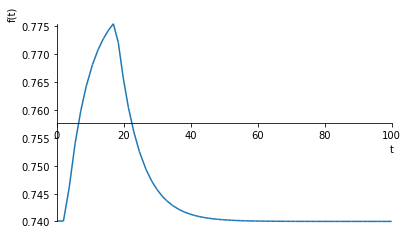

In [45]:
sympy.plot(g11 + 0.74,(t, 0, 100))